A precisão do modelo é: 0.15


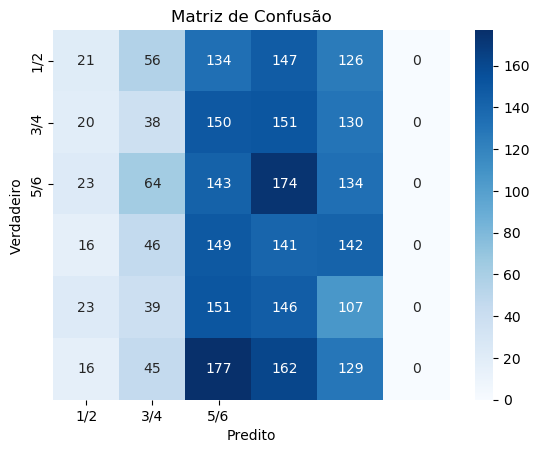

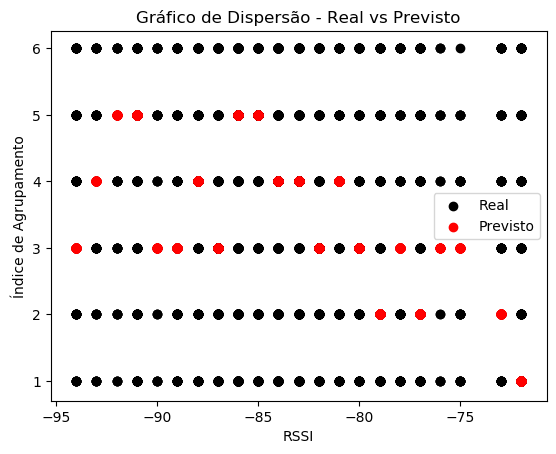

A previsão para os novos dados é: [1 3 2]


In [10]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

# Carregando os dados
dados_originais = pd.read_csv('coletac1.csv')
amostra = pd.read_csv('modelo.csv')

# Renomeando a coluna 'RSSI' nos dados_originais para evitar conflitos
dados_originais.rename(columns={'RSSI': 'RSSI_originais'}, inplace=True)

# Unindo os dados originais com a amostra com base no BSSID
dados_unidos = pd.merge(amostra, dados_originais, on='BSSID')

# Selecionando as colunas relevantes para treinamento
X = dados_unidos[['RSSI_originais']]

# Definindo os rótulos (y) com base no índice_agrupamento
y = dados_unidos['indice_agrupamento']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando o modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Treinando o modelo
modelo.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
previsoes = modelo.predict(X_test)

# Avaliando a precisão do modelo
precisao = accuracy_score(y_test, previsoes)
print(f'A precisão do modelo é: {precisao}')

# Matriz de Confusão
matriz_confusao = confusion_matrix(y_test, previsoes)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', xticklabels=['1/2', '3/4', '5/6'], yticklabels=['1/2', '3/4', '5/6'])
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

# Gráfico de Dispersão
plt.scatter(X_test, y_test, color='black', label='Real')
plt.scatter(X_test, previsoes, color='red', label='Previsto')
plt.xlabel('RSSI')
plt.ylabel('Índice de Agrupamento')
plt.legend()
plt.title('Gráfico de Dispersão - Real vs Previsto')
plt.show()

# Exemplo de previsão para um novo conjunto de dados
novos_dados = pd.DataFrame({'RSSI_originais': [-70, -76, -77]})
previsao_nova = modelo.predict(novos_dados)

print(f'A previsão para os novos dados é: {previsao_nova}')


In [13]:
# Carregar novos dados rotulados
novos_dados_rotulados = pd.read_csv('teste.csv')

# Unir novos dados rotulados aos dados existentes
dados_rotulados = pd.concat([dados_unidos, novos_dados_rotulados], ignore_index=True)

# Selecionar colunas relevantes para treinamento
X_rotulado = dados_rotulados[['RSSI_originais']]

# Definir rótulos (y) com base no índice_agrupamento
y_rotulado = dados_rotulados['indice_agrupamento']

# Dividir dados rotulados em treinamento e teste
X_train_rotulado, X_test_rotulado, y_train_rotulado, y_test_rotulado = train_test_split(X_rotulado, y_rotulado, test_size=0.2, random_state=42)

# Criar e treinar o modelo com os dados rotulados
modelo_rotulado = RandomForestClassifier(n_estimators=100, random_state=42)
modelo_rotulado.fit(X_train_rotulado, y_train_rotulado)

# Fazer previsões no conjunto de teste dos dados rotulados
previsoes_rotulado = modelo_rotulado.predict(X_test_rotulado)

# Avaliar a precisão do modelo com os dados rotulados
precisao_rotulado = accuracy_score(y_test_rotulado, previsoes_rotulado)
print(f'A precisão do modelo com dados rotulados é: {precisao_rotulado}')


ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values